# What matter builds neutron stars? Hadronic or quark?

Neutron stars are extremely dense objects, formed in the aftermath of core-collapse supernovae and they are so compact that the density in their central regions exceeds by far the density of the atomic nuclei. The properties of such matter are not fully understood today and cannot be studied in terrestrial experiments, making neutron stars the only known laboratory to test theories about the matter's behaviour in extreme conditions. Initial theories assumed that neutron stars are built of neutrons (as their name suggests). More modern theories consider, more generally, hadronic matter or a mixture of hadronic and quark phases.

Here we consider two possible descriptions of the neutron stars: hadronic and quark models. We plot mass-radius relations for these two models. The meaning of these functions is as follows: if we would be able to measure the masses and radii of many neutron stars (without observational error), they should be placed on one of these curves.

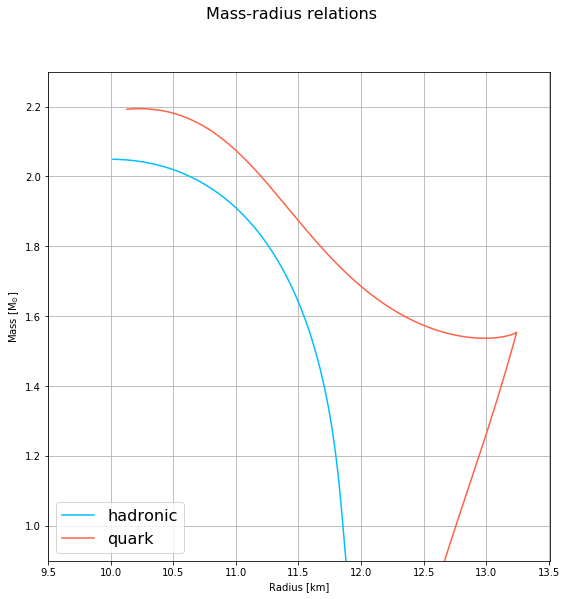

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Data
tablist = [  
        ['hadronic.tab', 'deepskyblue', 'hadronic'],
        ['quark.tab', 'tomato', 'quark'], 
              ]
              
#Prepare canvas
fig = plt.figure(figsize = (9,9))
gs = gridspec.GridSpec(1, 1) 

fig.suptitle(r'Mass-radius relations', fontsize = 16)

ax1 = plt.subplot(gs[0])
#ax1.set_xticks([])
ax1.set_ylabel(r'Mass [M$_{\odot}$]') 
ax1.set_xlabel(r'Radius [km]') 
ax1.set_ylim(0.9, 2.3)
ax1.set_xlim(9.5, 13.51)
ax1.grid(True)              

# Add curves in the loop
for tab in tablist:
    dat = np.genfromtxt(tab[0])
    r = dat[:,3]
    m = dat[:,4]
    ax1.plot(r, m, color = tab[1], label = tab[2])

ax1.legend(loc='lower left', fontsize = '16')
plt.show()

In principle, in the case of electromagnetic observations (telescopes), one can reproduce one of the above curves by observing and measuring masses and radii of the isolated (single) neutron stars. In the case of gravitational-wave detections, one can measure the so-called _chirp mass_ and _chirp radius_ , which are equivalent to the mass and radius of the binary system of the two neutron stars. For the theoretical details check [this publication](https://arxiv.org/pdf/1402.5156.pdf).

For our two models, we can calculate chirp mass and chirp radius relations. Again, if we would be able to measure many double neutron star systems with gravitational-wave detectors, they should occupy marked regions. Let us read chirp mass - chirp radius relations (for our two models) from the files and plot them. Note that this is artificial (generated and theoretical) data, not actual measurements!

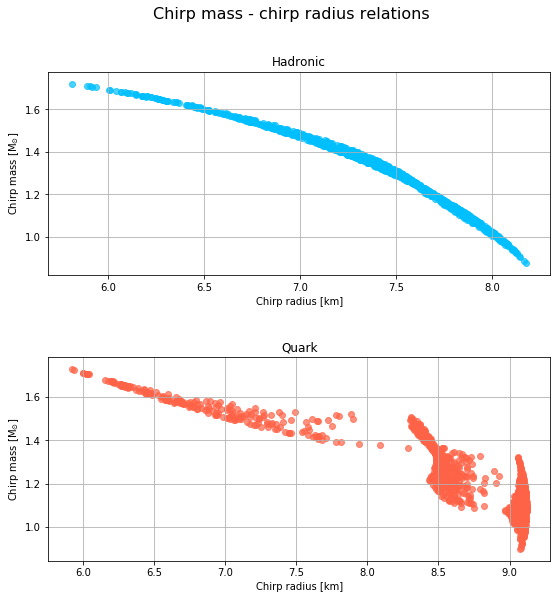

In [2]:
# Read data
data_chirp_h = np.genfromtxt('chirp_hadronic.txt')
data_chirp_q = np.genfromtxt('chirp_quark.txt')

def plot_chirps(dh, dq):
#Prepare canvas
    fig = plt.figure(figsize = (9,9))
    gs = gridspec.GridSpec(2, 1) 

    fig.suptitle(r'Chirp mass - chirp radius relations', fontsize = 16)

    ax1 = plt.subplot(gs[0])
    ax1.set_ylabel(r'Chirp mass [M$_{\odot}$]') 
    ax1.set_xlabel(r'Chirp radius [km]') 
    ax1.set_title(r'Hadronic')
    ax1.grid(True) 
    ax1.scatter(dh[:,0], dh[:,1], color = 'deepskyblue', marker='o', alpha = 0.7)


    ax2 = plt.subplot(gs[1])
    ax2.set_ylabel(r'Chirp mass [M$_{\odot}$]') 
    ax2.set_xlabel(r'Chirp radius [km]') 
    ax2.set_title(r'Quark')
    ax2.grid(True) 
    ax2.scatter(dq[:,0], dq[:,1], color = 'tomato', marker='o', alpha = 0.7)

    plt.subplots_adjust(hspace = 0.4)
    plt.show()
    
plot_chirps(data_chirp_h, data_chirp_q)

We can clearly see the difference between these two plots: in the chirp mass - chirp radius plane hadronic model forms one line-like cluster while the quark model forms three clusters. We can use a clustering algorithm to determine how many clusters can be identified in the data - that can answer the question which model (hadronic or quark) is more accurate.

To choose the right clustering algorithm we can take a look at [scikit documentation page](https://scikit-learn.org/stable/modules/clustering.html). We need an algorithm that does not require predefinition of the number of clusters and is relatively fast. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) seems to be a good choice. 

DBSCAN requires only one input parameter, _eps_ , that defines the maximum distance between two samples for one to be considered as in the neighbourhood of the other. The DBSCAN algorithm is as follows: for each point in the data
set it finds neighbour points inside the radius _eps_ and identifies the core points with more than _Pmin_ neighbours. Core points and their neighbourhoods (inside the radius _eps_ ) are identified as a cluster. The remaining points are assigned as noise.

First, let us normalise our data to have everything in the range (0,1).

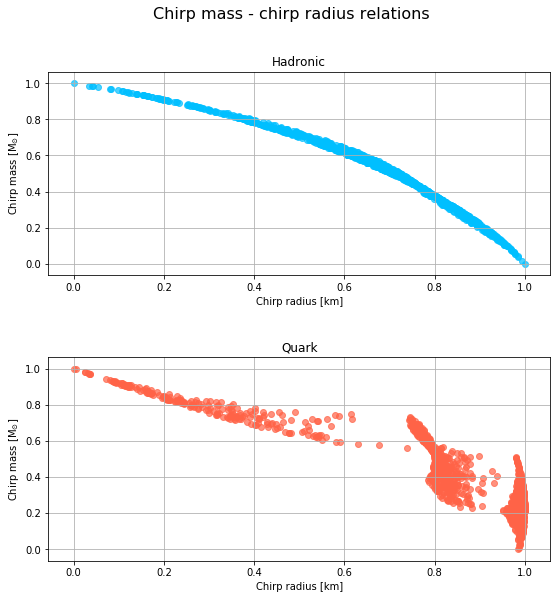

In [3]:
from sklearn.preprocessing import MinMaxScaler
X_h = MinMaxScaler().fit_transform(data_chirp_h)
X_q = MinMaxScaler().fit_transform(data_chirp_q)
plot_chirps(X_h, X_q)

And apply DBSCAN to the hadronic model:

In [19]:
from sklearn.cluster import DBSCAN
import time

t0 = time.time()
clustering = DBSCAN(eps = 0.047, min_samples = 5).fit(X_h)
t1 = time.time()

labels = clustering.labels_
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis = 0)

print('Estimated nuber of clusters: %d' % no_clusters)
print('Estimated noise points: %d' % no_noise)
print ('Execution time: %.5fs' % (t1 - t0))

Estimated nuber of clusters: 1
Estimated noise points: 0
Execution time: 0.00741s


As expected, DBSCAN found 1 cluster (and luckly no noise). Let us plot the result:

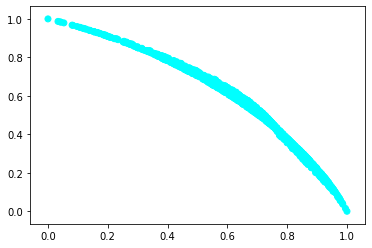

In [20]:
colors = list(map(lambda x: 
                  'black' if x == -1 else 
                  'aqua' if x == 0 else 
                  'violet' if x == 1 else 
                  'lime' if x == 2 else 'orange', labels))
plt.scatter(X_h[:,0], X_h[:,1], c = colors, marker = 'o')

And let us do the same for the quark model:

Estimated nuber of clusters: 4
Estimated noise points: 2
Execution time: 0.00986s


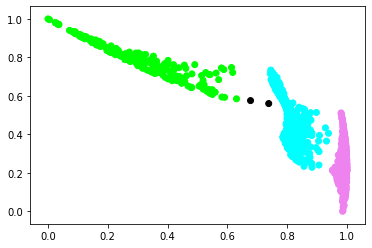

In [18]:
t0 = time.time()
clustering = DBSCAN(eps = 0.047, min_samples = 5).fit(X_q)
t1 = time.time()

labels = clustering.labels_
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis = 0)

print('Estimated nuber of clusters: %d' % no_clusters)
print('Estimated noise points: %d' % no_noise)
print ('Execution time: %.5fs' % (t1 - t0))

colors = list(map(lambda x: 
                  'black' if x == -1 else 
                  'aqua' if x == 0 else 
                  'violet' if x == 1 else 
                  'lime' if x == 2 else 'orange', labels))
plt.scatter(X_q[:,0], X_q[:,1], c = colors, marker = 'o')